# Week 2 - Sampling & Reliability

Up until this week, we have assumed that the corpus you have used for analysis assignments represented a *meaningful* assemblage of texts from which reasonable inferences could be drawn about the social game, social world and social actors that produced it. 

This week, we ask you to build a corpus for preliminary analysis and articulate what your sample represents in context of your final project. We begin by exploring how we can get *human* readings of content at scale. We want to gather and utilize human responses for several reasons. First, we may want to use crowdsourced human scores as the primary method of coding, extracting or organizing content (as it was in two of the assigned readings). Second, we may want to validate or tune a computational algorithm we may have developed in terms of how it is associated with human meanings or experience. Finally, we may want to use human coding on a sample of data as the basis for training a model or algorithm to then extrapolate *human-like* annotations to the entire population. Here intelligent sampling is critical to maximize effective maching training. 

For this notebook we will be using the following packages

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
!pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

  Cloning git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git to /tmp/pip-req-build-d71_ts2y
  Running command git clone -q git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git /tmp/pip-req-build-d71_ts2y
     |████████████████████████████████| 5.5MB 3.8MB/s 
     |████████████████████████████████| 122kB 46.4MB/s 
     |████████████████████████████████| 460kB 51.3MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
     |████████████████████████████████| 32.8MB 121kB/s 
     |████████████████████████████████| 481kB 51.7MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
     |████████████████████████████████| 450kB 51.3MB/s 
     |████████████████████████████████| 3.1MB 36.2MB/s 
     |████████████████████████████████| 1.0MB 42.9MB/s 
     |████████████████████████████████| 870kB 38.2MB/s 
  Created wheel for lucem-illud-2020: filename=lucem_illud_2020-8.0.1-cp36-none-any.whl size=35151 sha256=0bdf06d53ed0bfeca082ae72268dded7a

## <span style="color:red">*Pitch the Domain of your Project*</span>

<span style="color:red">In the two cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words) and **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words)? [**Note**: your individual or collective project can change over the course of the quarter if new data and/or analysis opportunities arise or if old ones fade away.]

## ***What?*** 
<200 words


At the behest of the Atlantic Council, a think tank with ties to/funded by NATO and U.S. defense groups, a swath of Facebook pages that were said to be spreading disinformation were “purged” from the site. However, many of these pages were critical of U.S. foreign policy, leading to concerns about rising censorship on the social media platform. In this project, we would like to study the Facebook purge using text analysis methods. Specifically, we will explore whether the presence of certain topics related to national security and the positions media outlets take on them can be correlated with an increased risk of censorship.

In order to detect these topics, we will collect and analyze text from the purged Facebook pages using methods such as LDA topic modeling and STM. Once topics related to foreign policy within the censored pages emerge, then we can compare these findings with the NOW, news on the web, dataset in the Davies Corpora to understand the semantic differences between the purged pages and mainstream media. We will, therefore, be able to model which topics trigger potential censorship. 

We then explore how those topics differ in treatment between the two words(censored news versus mainstream news) using Word2Vec models.

## ***Why?***
<200 words

Within our project team, we often debate what features actually define Fake News. Does Fox spread misinformation, or does Al Jazeera? Cultural framings and personal biases dictate what a news consumer considers verified news or misinformation. Is the removal of articles from these publications censorship? Our own internal team debate reflects the larger public discussion around the subjectivity of journalism, as well as the difficulty in defining a standard for Fake News. Despite the difficulty, digital platforms today have been tasked with defining, identifying, and limiting misinformation on their sites. But it is important to critically examine, who exactly decides what is fake news, and the implications of that enforcing standard.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

I wanted to create dimensions in vector space to project vectors 

onto. Specifically, I wanted to create three dimensions. 

First Dimension: Uncertainity/Certainity
On this dimension I wanted to project "Russian Interference" and related phrases and compare it with 'Israel Interference' to measure if there was a difference in certainty in mainstream news articles and censored news articles.

Second Dimension: Aggressor/Reactor
On this dimension I wanted to project countries invovled in conflicts (Israel/Palestine), (Iran/U.S) to see if who is seen to be more aggressive and who is seen to be reacting to aggression from elsewhere.

Third Dimension: Political Left/Political Right
On this dimension I wanted to project media organinazations like CNN, MSNBC to see if they are conceptualized as left-wing or right-wing in both mainstream news articles and censored news articles

To this end, I wanted to validate the words I chose to create the dimensions. 


In [0]:
The words used to create the dimensions are:
Dimension 1:
Certainty in Knowledge of an event
proof
fact
evidence
undeniably
certainty
knowledge
reliable
verifiable
trustworthy
persuasive
confirmation

Uncertainty in Knowledge/Skpeticism/Disbelief of an event
inconclusive
unproven
unfounded
speculation
hearsay
untrue
uncertainty
unknown
specious
unsupported
unverified
accusation

Dimension 2:

Aggresor(in relation to countries)
oppress
oppressor
aggressor
attack
terrorize
occupier
interventionist

Victim/Reactor/Non-Aggresor(in relation to countries)
victim
defender
counterattack
defend
helpless

Dimension 3:
Leftist political ideology(words referencing)
leftist
democrat
socialist
anarchist
marxist
socialism
marxism
anarchism

Right political ideology(words referencing)
right_wing
republican
conservative
corporatism
corporatist
fascism
neoconservative
neocon
neoconservatives
neocons

I asked three annotaters (2 Graduate School Students, 1 Post-Graduate) to validate if these words belonged to the category they fall under using a binary (1/0) option for each word. Then I performed the following analysis. The limitation of this approach is that, my initial choices for the words were subjectively made and the annotators can't add to my choices but at best disagree with them. 

## <span style="color:red">*Your turn*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides in the Assignment link on Canvas, or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
x = np.loadtxt("/content/drive/My Drive/Content Analysis/week-2/Annotations.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

In [0]:
#printing out the annotations (53 words, 3 annotators)
#Looking at the annotations, there seem to be a lot of 1's, which corresponds to agreement with my choices.
#Annotater 2 seems to agree with all my choices
anno.annotations

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [0]:
#printing out the binary labels
anno.labels

[0.0, 1.0]

In [0]:
#no missing values
anno.missing_values

[]

In [0]:
#immeadiately we notice that when it comes to 1's, there is good agreement, which suggests that the original choices for the words I made were reasonable.
#However there is not way to know if they were exhaustive. When it comes to 0's, the relative sparsity of those labels is affecting the pairwise scores. 
pyanno.measures.agreement.labels_frequency(anno.annotations,2)

array([0.06289308, 0.93710692])

[[ 2.  6.]
 [ 0. 45.]]


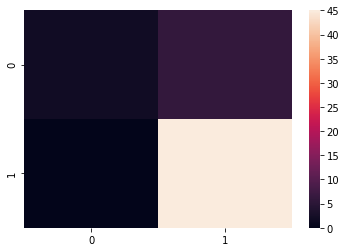

In [0]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,2],2)
print(c)
ac = seaborn.heatmap(c)
plt.show()

I choose to compare annotator 1 and 3 since annotator two agree with all my choices. Turns out that there is great agreement on most of the cases.

In [0]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,2])

0.33749999999999997

Scott's pi is not very high, I suspect this is because of the sparsity of certain labels. Perhaps it's not a good indicator for unbalanced annotations.

In [0]:
fleiss_kappa(anno.annotations[::])

0.1463087248322164

Fleiss kappa is even lower, this suggests that it's even more sensitive to the sparsity of 0's

In [0]:
krippendorffs_alpha(anno.annotations[::])

0.15167785234899334

Overall krippendorffs scores is low which can be expected given, it's a generalization of the previous score to multiple annotators.

In [0]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,2])

0.3614457831325299

Cohen's kappa seems similiar to scott's pi. Low score could be due to sparsity of 0's. 

In [0]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.0

Comparing any annotator to annotator 2 who agreed with all my choices leads to a score of zero. This metric suggests the agreements are by chance. Perhaps the metric suggests that a person who labels all datapoints the same way is not a worthy annotator.

In [0]:
cohens_kappa(anno.annotations[:,1], anno.annotations[:,2])

0.0

In [0]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[1.         0.         0.36144578]
 [0.                nan 0.        ]
 [0.36144578 0.         1.        ]]


/usr/local/lib/python3.6/dist-packages/pyanno/measures/helpers.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return (observed_agreement - chance_agreement) / (1. - chance_agreement)


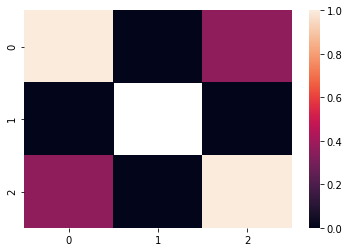

In [0]:
ax = seaborn.heatmap(m)
plt.show()

In [0]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 


In [0]:
pairwise_metric_average(cohens_kappa, anno.annotations)

0.1204819277108433

Given the low pairwise score of 0 when comparing with the second annotator, the pairwise average is not suprising at all.

In [5]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,2])

0.36144578313253006

In [6]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.0

In [0]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.12048192771084336

The situation with Cohen's weighted kappa looks about the same. 

The problem seems to be that because there is such a high agreement and that that agreements happens in one label which is predominant, these metrics seems to think the agreement is by chance. That makes sense..I spoke to every annotator at this point and they seemed to have given the annotations lots of thought and were able to explain their choices.

Your turn
In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

Now I will try to determine using the various estimators if all annotators were equally reliable.

In [7]:
model = ModelB.create_initial_state(2, 3)
print(model.log_likelihood(anno.annotations))

-102.84595350573866


In [0]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [9]:
model.map(anno.annotations)
print(model.log_likelihood(anno.annotations))

-33.812256934932236


The model's log likelihood increases when annotations are being accounted for, which indicates reduction in information entropy present in the model initialization.

In [0]:
posterior = model.infer_labels(anno.annotations)
print((posterior))

[[4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [8.75434297e-09 9.99999991e-01]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [1.32641560e-10 1.00000000e+00]
 [1.32641560e-10 1.00000000e+00]
 [1.32641560e-10 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [1.32641560e-10 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [1.32641560e-10 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [8.75434297e-09 9.99999991e-01]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.863523

Unfortunately the model seems to predict 1 for every datapoint even though my majority voting, a couple datapoints have zero. To visualize this point I used the following provided function.

In [0]:
votes = []
for r in anno.annotations:
    v = [0] * len(anno.labels)
    votes.append(v)
    for a in r:
        if a > -1:
            v[a] += 1
votes_array = np.array(votes)

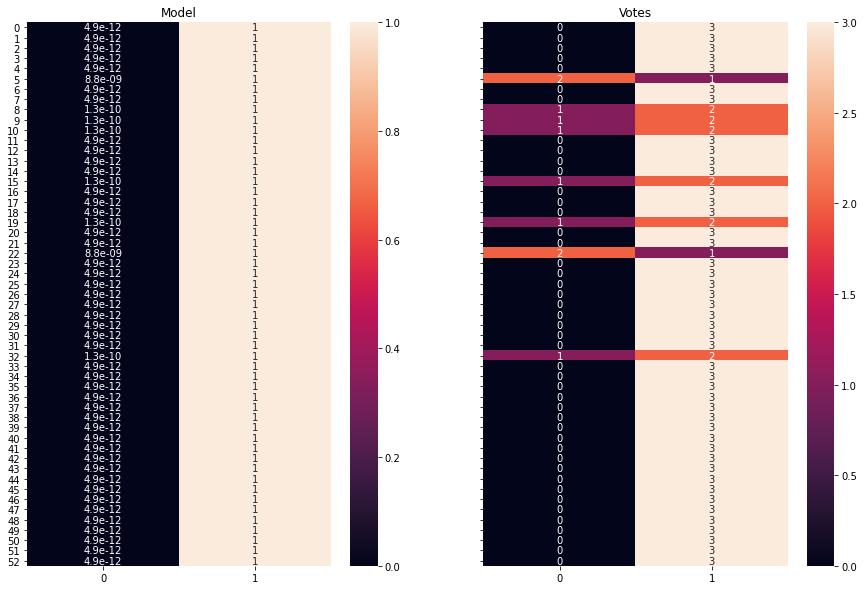

In [0]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)
num_questions = 53

seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
seaborn.heatmap(posterior[:num_questions], annot=True, ax =ax1)
ax1.set_title("Model")
ax2.set_title("Votes")
plt.show()

The above confirms that the modelling also does not account for sparsity in labels even thought for a particular datapoint the sparse label is in marjority.

I will only try to repeat the experiment with the other model.

In [10]:
model = ModelBt.create_initial_state(2, 3)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.73609492 0.80856917 0.63204962]
-164.15582357139616


In [11]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.85244091 0.99999827 0.96334579]
-31.009564926510315


Once again entropy decreases once annotations are accounted for

In [0]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
posterior2 = model.infer_labels(anno.annotations)
print(posterior2)

[[4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [8.75434297e-09 9.99999991e-01]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [1.32641560e-10 1.00000000e+00]
 [1.32641560e-10 1.00000000e+00]
 [1.32641560e-10 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [1.32641560e-10 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [1.32641560e-10 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [8.75434297e-09 9.99999991e-01]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.86352384e-12 1.00000000e+00]
 [4.863523

We seem to have the same issue as the previous model with all annotations being essentially marked 1 with high certainty.

In [0]:
posterior2-posterior

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

The difference in the probabilitiy distribution in the cases is basically non-existent.

The above subtraction between the two posterior probabilities shows that 

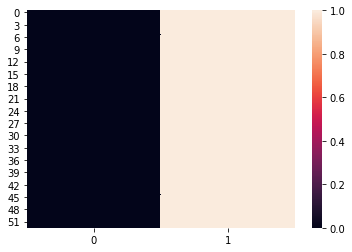

In [0]:
ax = seaborn.heatmap(posterior)
plt.show()

Thus to no surpise, we get the same result

In [0]:
model = ModelBt.create_initial_state(2, 3)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)#.mean(axis = 1).mean(axis = 1)
y_ci = samples.std(axis=0)#.mean(axis = 1).mean(axis = 1)

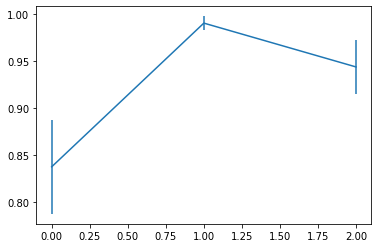

In [0]:
plt.figure()
plt.errorbar(range(3),y, yerr = y_ci)
plt.show()

I use MLE above to test the quality of the annotators. Seems that the annotator hurt the most is the one who diverged from others and used the most number of 0's in labelling. He was however able to defend every single choice in private conversation, so overall I wasn't worried with the annotation process for this highly subjective task.

I wanted to check if I add another annotator who randomly assign 1's and 0's with uniform probability will the model be able to detect this outlier.

In [0]:
r=np.random.choice([0,1], 53,[0.5]*53)
r = np.reshape(r, (-1, 1))

Creating random annotator above and concatinating to existing annotations

In [0]:
x_random=np.concatenate((x, r), axis=1)

In [0]:
anno_random = AnnotationsContainer.from_array(x_random, missing_values=[-1])

In [0]:
model = ModelBt.create_initial_state(2, 4)
model.mle(anno_random.annotations)
samples = model.sample_posterior_over_accuracy(anno_random.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)#.mean(axis = 1).mean(axis = 1)
y_ci = samples.std(axis=0)#.mean(axis = 1).mean(axis = 1)

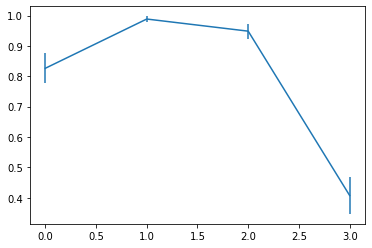

In [0]:
plt.figure()
plt.errorbar(range(4),y, yerr = y_ci)
plt.show()

The random annoatator is severly penalized

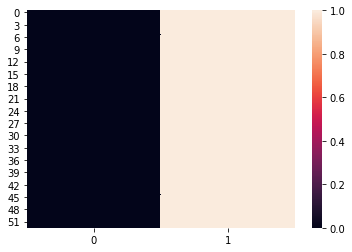

In [0]:
posterior2 = model.infer_labels(anno_random.annotations)
ax = seaborn.heatmap(posterior2)
plt.show()

And for the probability distribution, the random annotator doesn't seem to have made any differene with 1's getting nearly certain probabilities (close to 1). 

In [0]:
votes_random = []
for r in anno_random.annotations:
    v = [0] * len(anno.labels)
    votes_random.append(v)
    for a in r:
        if a > -1:
            v[a] += 1
votes_array = np.array(votes_random)

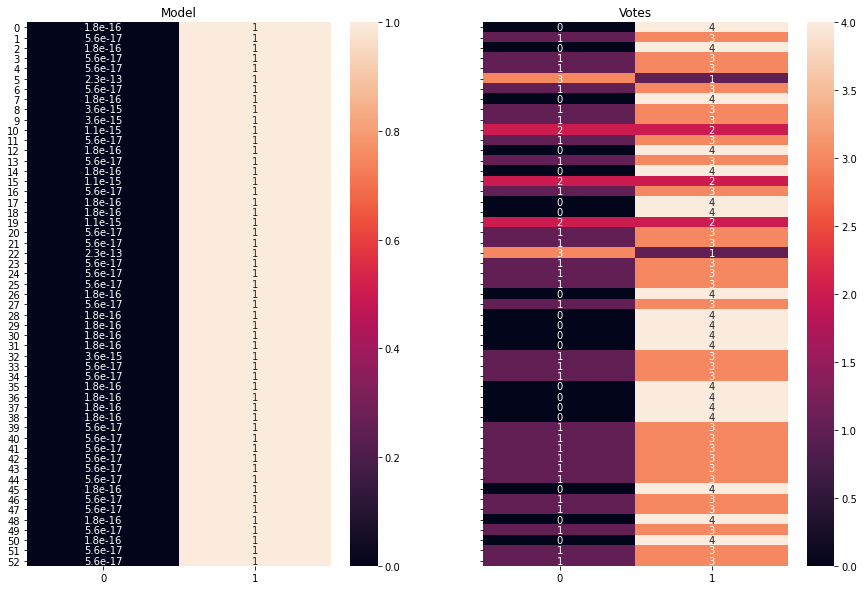

In [0]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)
num_questions = 53

seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
seaborn.heatmap(posterior2[:num_questions], annot=True, ax =ax1)
ax1.set_title("Model")
ax2.set_title("Votes")
plt.show()

Here we can see that, once again even with the random annotator, and even for cases with majority label zero, the model predicts 1's. 
This means that this model might not be a good fit for cases where a label is sparse(Spam detection), but it is also good at ignoring the noise created by an unreliable annotator who is making uniformly random choices unrelated to the "true" distribution of the labels.